<a href="https://colab.research.google.com/github/yceffort/pytorch-study/blob/master/02_2)_multi_layer_perception_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

from matplotlib import pyplot as plt
from matplotlib import cm

import pandas as pd

%matplotlib inline

In [0]:
from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [0]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [0]:
mnist['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
mnist_data = mnist['data'] / 255

pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


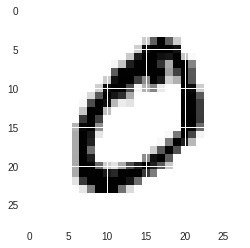

In [0]:
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)
plt.show()

In [0]:
mnist_label = mnist['target']
mnist_label

array([0., 0., 0., ..., 9., 9., 9.])

In [0]:
train_size = 50000
test_size = 500
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(mnist_data, 
                                                                    mnist_label, 
                                                                    train_size=train_size, 
                                                                    test_size=test_size
                                                                   )

In [39]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [40]:
train_X = torch.from_numpy(train_X).float().to(device)
train_Y = torch.from_numpy(train_Y).long().to(device)


test_X = torch.from_numpy(test_X).float().to(device)
test_Y = torch.from_numpy(test_Y).long().to(device)

print(train_X.shape)
print(train_Y.shape)

torch.Size([50000, 784])
torch.Size([50000])


In [0]:
train = TensorDataset(train_X, train_Y)
train_loader = DataLoader(train, batch_size=100, shuffle=True)

In [42]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 256)
    self.fc3 = nn.Linear(256, 256)
    self.fc4 = nn.Linear(256, 128)
    self.fc5 = nn.Linear(128, 128)
    self.fc6 = nn.Linear(128, 10)
    
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.dropout(x, training=self.training)
    x = self.fc6(x)
    return F.log_softmax(x)
    
model = Net()
model.cuda()

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=10, bias=True)
)

In [44]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
  
  total_loss = 0
  
  for train_x, train_y in train_loader:
    
    train_x, train_y = Variable(train_x), Variable(train_y)
    
    optimizer.zero_grad()
    
    output = model(train_x)
    
    
    loss = criterion(output, train_y)
    
    loss.backward()
    
    optimizer.step()
    
    total_loss += loss.data.item()
    
  if (epoch+1) % 10 == 0:
    print(epoch+1, total_loss)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


10 1.8332510799591546
20 1.124042778454168
30 0.9034732849795546
40 1.7279012033341132
50 0.9543563447568886
60 0.7835014422198583
70 0.7459111414264044
80 0.5498186401500789
90 0.5291335411966429
100 0.5317408466489724
110 0.48422150836768196
120 0.465564259047369
130 0.42922057283794857
140 0.4166068756940149
150 1.7415992272435687
160 0.6763175345968193
170 0.3614254495023488
180 0.3171036502053539
190 0.9956358470662963
200 0.46374395769998955
210 0.4765768758734339
220 0.31791206007665096
230 0.383679550161105
240 0.3004045407060403
250 0.3024570884517743
260 0.1999269867401381
270 0.3216467906404432
280 0.2047587748973001
290 0.18448788962246
300 0.2686509495547398
310 0.23520767115360286
320 0.1612725471665044
330 0.2563193959014143
340 0.27242521464199854
350 0.19562302171584633
360 0.3724025609312207
370 0.12755460169569233
380 0.15775793878538025
390 0.1674609845077839
400 0.1192817611403143
410 0.1321188612204196
420 0.10541655894053292
430 0.14341363379810446
440 0.12621220

In [51]:
test_x, test_y = Variable(test_X), Variable(test_Y)
result = torch.max(model(test_x).data, 1)[1]
accuracy = sum(test_y.cpu().data.numpy() == result.cpu().numpy()) / len(test_y.cpu().data.numpy())

accuracy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


0.974

In [50]:
test_y.cpu().data

tensor([9, 5, 1, 6, 2, 0, 6, 9, 5, 8, 7, 3, 1, 5, 3, 3, 2, 0, 3, 3, 4, 8, 2, 2,
        8, 8, 0, 3, 0, 8, 3, 7, 8, 5, 0, 2, 1, 4, 8, 7, 6, 0, 0, 9, 1, 2, 7, 3,
        6, 1, 1, 7, 7, 6, 6, 1, 8, 6, 7, 6, 9, 6, 0, 6, 5, 7, 7, 0, 3, 5, 5, 7,
        6, 6, 0, 0, 1, 6, 1, 8, 9, 2, 4, 8, 5, 4, 8, 9, 3, 4, 1, 8, 0, 7, 1, 9,
        6, 8, 3, 2, 0, 3, 7, 1, 7, 7, 6, 5, 3, 3, 4, 6, 7, 7, 7, 4, 4, 5, 0, 7,
        1, 3, 9, 4, 5, 0, 0, 6, 6, 9, 2, 5, 1, 3, 9, 2, 9, 5, 9, 5, 1, 3, 6, 6,
        4, 7, 3, 7, 1, 6, 1, 6, 0, 9, 7, 8, 3, 0, 8, 8, 7, 3, 7, 9, 6, 2, 2, 6,
        6, 5, 7, 9, 6, 6, 9, 9, 5, 6, 4, 6, 3, 0, 4, 9, 3, 9, 0, 4, 9, 8, 6, 0,
        3, 2, 6, 7, 6, 3, 0, 3, 9, 8, 5, 7, 1, 0, 6, 0, 6, 2, 2, 4, 2, 3, 2, 6,
        1, 9, 5, 0, 1, 8, 0, 6, 6, 4, 6, 9, 2, 6, 7, 8, 5, 9, 4, 2, 4, 5, 4, 3,
        5, 3, 9, 7, 0, 5, 7, 3, 9, 6, 6, 4, 3, 9, 5, 9, 8, 6, 9, 8, 4, 3, 6, 0,
        1, 9, 3, 6, 1, 5, 0, 6, 5, 9, 7, 2, 0, 4, 4, 7, 3, 4, 7, 7, 8, 3, 2, 6,
        8, 1, 8, 5, 3, 1, 7, 5, 8, 4, 5,